# Decision making, movement planning and statistical decision theory - Trommershauser, Maloney, and Landy (2008)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 16}) 

## Box 1 

Equivalence of a movement task and decision making under risk. 700 ms to touch screen. 

+2.5c : inside green 

-12.5c : inside red 

-10c : overlap 

+0c : outside green and red 

In [2]:
# create circles 
def circleXY(c,r,n=100):
    '''
    Find x and y values of a circle with given center (c) and radius (r)

    INPUTS:
    c: center, array or list of floats 
    r: radius, float 
    n: granularity, int

    OUTPUT:
    X/Y: x and y values of circle 
    '''
    th = np.linspace(0, 2*np.pi, num=n)
    X = r * np.cos(th) + c[0]
    Y = r * np.sin(th) + c[1]
    return X, Y

In [3]:
# create agent 
def agent(aim, sd):
    reachX = np.random.normal(aim[0], sd/1.25) # sd/1.25 works to make euclidean error 5.6 at high N 
    reachY = np.random.normal(aim[1], sd/1.25)
    return reachX,reachY

In [4]:
def eucD(P1, P2):
    return np.sqrt((P2[0] - P1[0])**2 + (P2[1] - P1[1])**2)

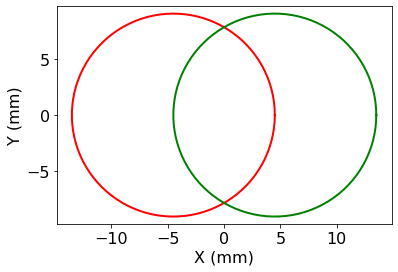

In [5]:
# Set up 
penC = np.array([-9/2,0])
rewC = np.array([9/2,0])
rad = 9
penX,penY = circleXY(penC, rad)
rewX,rewY = circleXY(rewC, rad)
nreaches = 200

plt.figure()
plt.plot(penX, penY, c='r', lw=2)
plt.plot(rewX, rewY, c='g', lw=2)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.axis('equal')
plt.show()

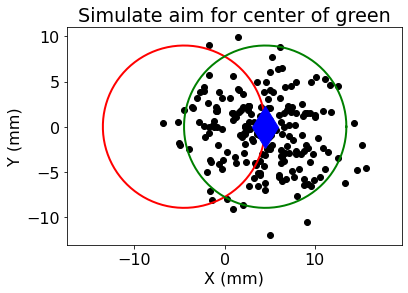

In [6]:
# aim at center of green 
sd = 5.6 # mm
aimed1 = np.array([9/2, 0]) # mm
# initialize visualization 
plt.figure()
plt.plot(penX, penY, c='r', lw=2)
plt.plot(rewX, rewY, c='g', lw=2)
plt.plot(aimed1[0], aimed1[1], c='b', marker='d', markersize=30)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.axis('equal')
plt.title('Simulate aim for center of green')

# reaches 
reachX, reachY = np.zeros(nreaches), np.zeros(nreaches)
for i in range(nreaches):
    reachX[i], reachY[i] = agent(aimed1, sd)

# finalize visualization 
plt.scatter(reachX, reachY, c='k')
plt.show()

In [7]:
# Check simulation 

# mean euclidean error
er = np.zeros(nreaches)
for i in range(nreaches):
    er[i] = eucD(aimed1, np.array([reachX[i], reachY[i]]))

print(f'Mean Euclidean error = {np.mean(er):.3f}') # should be 5.6 

# green only, red only, green and red, !green and !red 
green_only = 0 
red_only = 0 
green_n_red = 0
green_u_red = 0
for i in range(nreaches):
    distGreen = eucD(rewC, np.array([reachX[i], reachY[i]]))
    distRed = eucD(penC, np.array([reachX[i], reachY[i]]))
    if distGreen < rad and distRed >= rad: # green only 
        green_only += 1
    elif distGreen >= rad and distRed < rad: # red only 
        red_only += 1
    elif distGreen < rad and distRed < rad: # green and red 
        green_n_red += 1
    elif distGreen >= rad and distRed >= rad: # !green and !red 
        green_u_red += 1
print(f'{green_only/nreaches:.2f}, +2.5 cents') # green only 
print(f'{green_n_red/nreaches:.2f}, -10 cents') # green and red  
print(f'{red_only/nreaches:.2f}, -12.5 cents') # red only 
print(f'{green_u_red/nreaches:.2f}, 0 cents') # !green and !red

Mean Euclidean error = 5.303
0.52, +2.5 cents
0.39, -10 cents
0.04, -12.5 cents
0.07, 0 cents


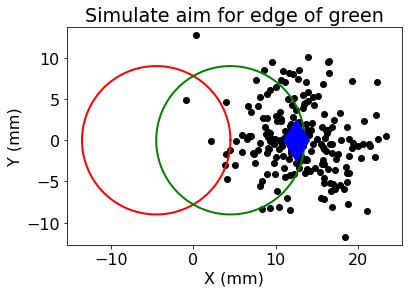

In [8]:
# aim towrads edge of green 
sd = 5.6 # mm
aimed2 = np.array([rewC[0]+8, 0]) # mm
# initialize visualization 
plt.figure()
plt.plot(penX, penY, c='r', lw=2)
plt.plot(rewX, rewY, c='g', lw=2)
plt.plot(aimed2[0], aimed2[1], c='b', marker='d', markersize=30)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.axis('equal')
plt.title('Simulate aim for edge of green')

# reaches 
reachX, reachY = np.zeros(nreaches), np.zeros(nreaches)
for i in range(nreaches):
    reachX[i], reachY[i] = agent(aimed2, sd)

# finalize visualization 
plt.scatter(reachX, reachY, c='k')
plt.show()

In [9]:
# Check simulation 

# mean euclidean error
er = np.zeros(nreaches)
for i in range(nreaches):
    er[i] = eucD(aimed2, np.array([reachX[i], reachY[i]]))

print(f'Mean Euclidean error = {np.mean(er):.3f}') # should be 5.6 

# green only, red only, green and red, !green and !red 
green_only = 0 
red_only = 0 
green_n_red = 0
green_u_red = 0
for i in range(nreaches):
    distGreen = eucD(rewC, np.array([reachX[i], reachY[i]]))
    distRed = eucD(penC, np.array([reachX[i], reachY[i]]))
    if distGreen < rad and distRed >= rad: # green only 
        green_only += 1
    elif distGreen >= rad and distRed < rad: # red only 
        red_only += 1
    elif distGreen < rad and distRed < rad: # green and red 
        green_n_red += 1
    elif distGreen >= rad and distRed >= rad: # !green and !red 
        green_u_red += 1
print(f'{green_only/nreaches:.2f}, +2.5 cents') # green only 
print(f'{green_n_red/nreaches:.2f}, -10 cents') # green and red  
print(f'{red_only/nreaches:.2f}, -12.5 cents') # red only 
print(f'{green_u_red/nreaches:.2f}, 0 cents') # !green and !red

Mean Euclidean error = 5.408
0.43, +2.5 cents
0.03, -10 cents
0.00, -12.5 cents
0.54, 0 cents
